In [1]:
# This notebook details DCD through a simple example of a Covid+ case.
# Deep COVID DeteCT: an International Experience on COVID-19 Lung Detection and Prognosis using Chest CT



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from models.inception3d_backbone import Inception_Inflated3d
tf.keras.backend.clear_session()
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
img = np.load("sample_data/covid_pos_study.npy")
print(img.shape)

(24, 256, 256, 1)


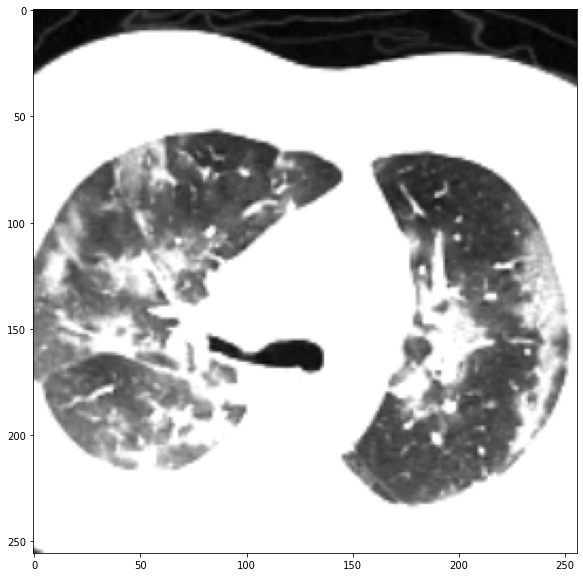

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(img[5,:,:,0], cmap='gray')

In [5]:
def dcd_model(num_frames = 24, img_size = 256, num_channels = 3):
    inputs = tf.keras.layers.Input(shape=[num_frames, img_size, img_size, 1])
    inputs_ = tf.keras.layers.Concatenate(axis=4)([inputs, inputs, inputs])
    base_model = Inception_Inflated3d(include_top=False, 
                                      input_shape=(num_frames, img_size, img_size, num_channels),
                                      classes=3)
    hidden = base_model(inputs_)
    hidden = tf.keras.layers.AveragePooling3D((2, 1, 1), 
                                              strides=(1, 1, 1),
                                              padding='valid')(hidden)
    hidden = tf.keras.layers.Flatten()(hidden)
    hidden = tf.keras.layers.Dense(3)(hidden)
    out = tf.keras.layers.Activation('softmax')(hidden)
    model  = tf.keras.Model(inputs = inputs, outputs = out)
    return model
model = dcd_model()
model.load_weights("checkpoints/dcd.h5")


shape of global avg pool: (None, 2, 1, 1, 1024)


class probabilities: [[9.5796304e-10 3.2528033e-06 9.9999678e-01]]
class prediction: 2


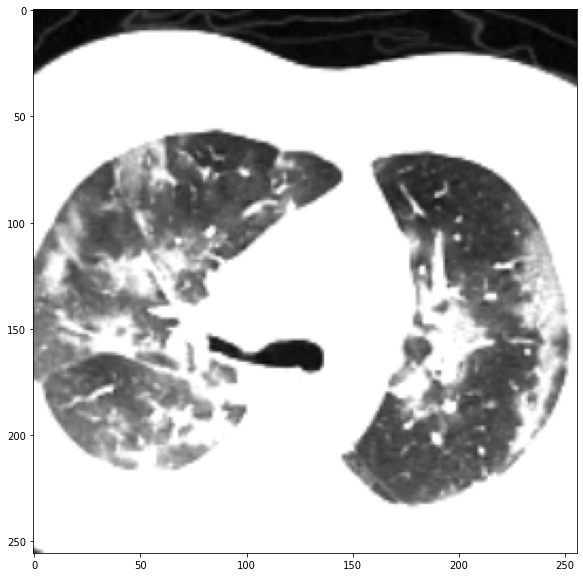

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(img[5,:,:,0], cmap='gray')

# plt.imshow(img[5,:,:,0], cmap='gray')
probs = model.predict(np.expand_dims(img,0))
print("class probabilities:", probs)
print("class prediction:", np.argmax(probs)) # Normal CTRL : 0, COVID- PNA : 1, COVID+ : 2

class probabilities: [[9.9939167e-01 6.0392777e-04 4.3590348e-06]]
class prediction: 0


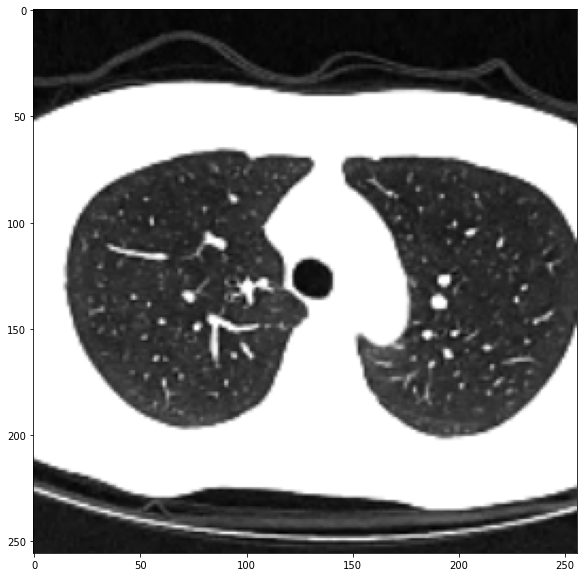

In [29]:
img = np.load("sample_data/covid_normal_study.npy")
plt.figure(figsize = (10,10))
plt.imshow(img[5,:,:,0], cmap='gray')

probs = model.predict(np.expand_dims(img,0))
print("class probabilities:", probs)
print("class prediction:", np.argmax(probs)) # Normal CTRL : 0, COVID- PNA : 1, COVID+ : 2

In [26]:
# plt.figure(figsize = (3,3))
# plt.imshow(np.flip(img[:,:,:,0],0)[5,:,:], cmap='gray')

# plt.figure(figsize = (3,3))
# plt.imshow(np.flip(img[:,:,:,0],0)[15,:,:], cmap='gray')

# plt.figure(figsize = (3,3))
# plt.imshow(img[5,:,:,0], cmap='gray')

# plt.figure(figsize = (3,3))
# plt.imshow(img[15,:,:,0], cmap='gray')

class probabilities: [[0.5264961  0.11170607 0.36179784]]
class prediction: 0


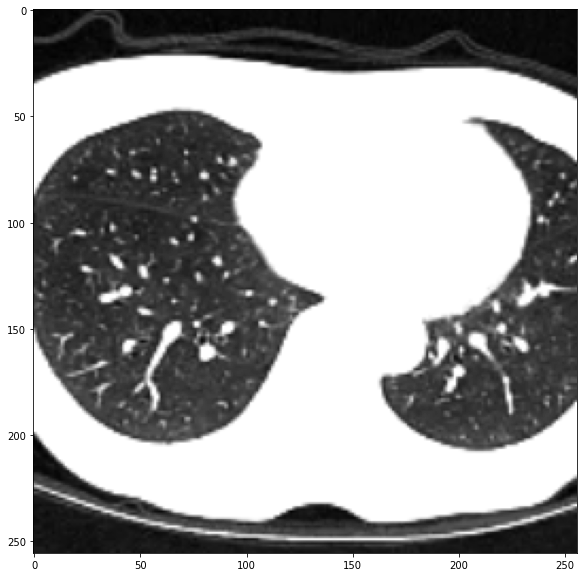

In [30]:
# z-flipped images also work:

plt.figure(figsize = (10,10))
plt.imshow(np.flip(img[:,:,:,0],0)[5,:,:], cmap='gray')

# plt.imshow(img[5,:,:,0], cmap='gray')
probs = model.predict(np.expand_dims(np.flip(img, 0), 0))
print("class probabilities:", probs)
print("class prediction:", np.argmax(probs)) # Normal CTRL : 0, COVID- PNA : 1, COVID+ : 2

(24, 256, 256, 1)
class probabilities: [[2.0716888e-09 5.7084953e-06 9.9999428e-01]]
class prediction: 2


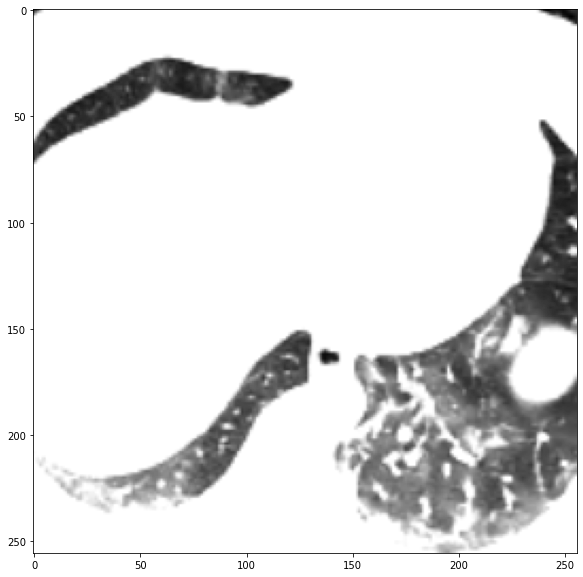

In [31]:
img = np.load("sample_data/covid_pos_study.npy")
print(img.shape)

# z-flipped images also work:

plt.figure(figsize = (10,10))
plt.imshow(np.flip(img[:,:,:,0],0)[5,:,:], cmap='gray')

# plt.imshow(img[5,:,:,0], cmap='gray')
probs = model.predict(np.expand_dims(np.flip(img, 0), 0))
print("class probabilities:", probs)
print("class prediction:", np.argmax(probs)) # Normal CTRL : 0, COVID- PNA : 1, COVID+ : 2